In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("Wholesale customers data.csv")

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [6]:
df.info

<bound method DataFrame.info of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4

In [7]:
df.describe

<bound method NDFrame.describe of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  

In [8]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

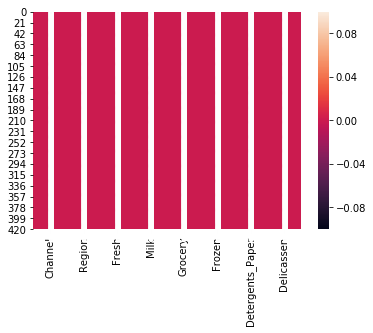

In [9]:
sns.heatmap(df.isnull(),annot=True)
plt.show()

In [10]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

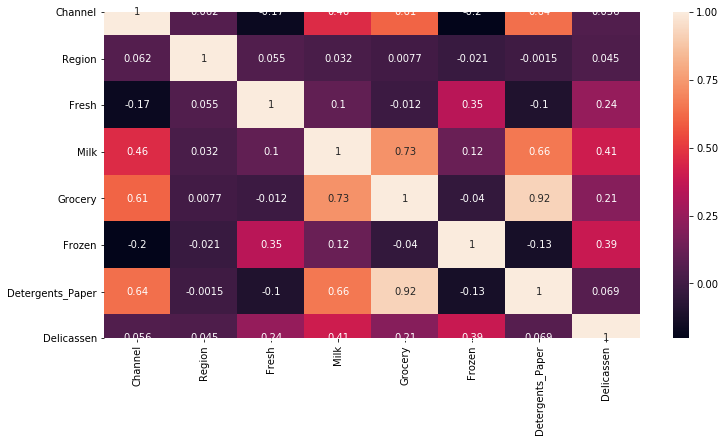

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

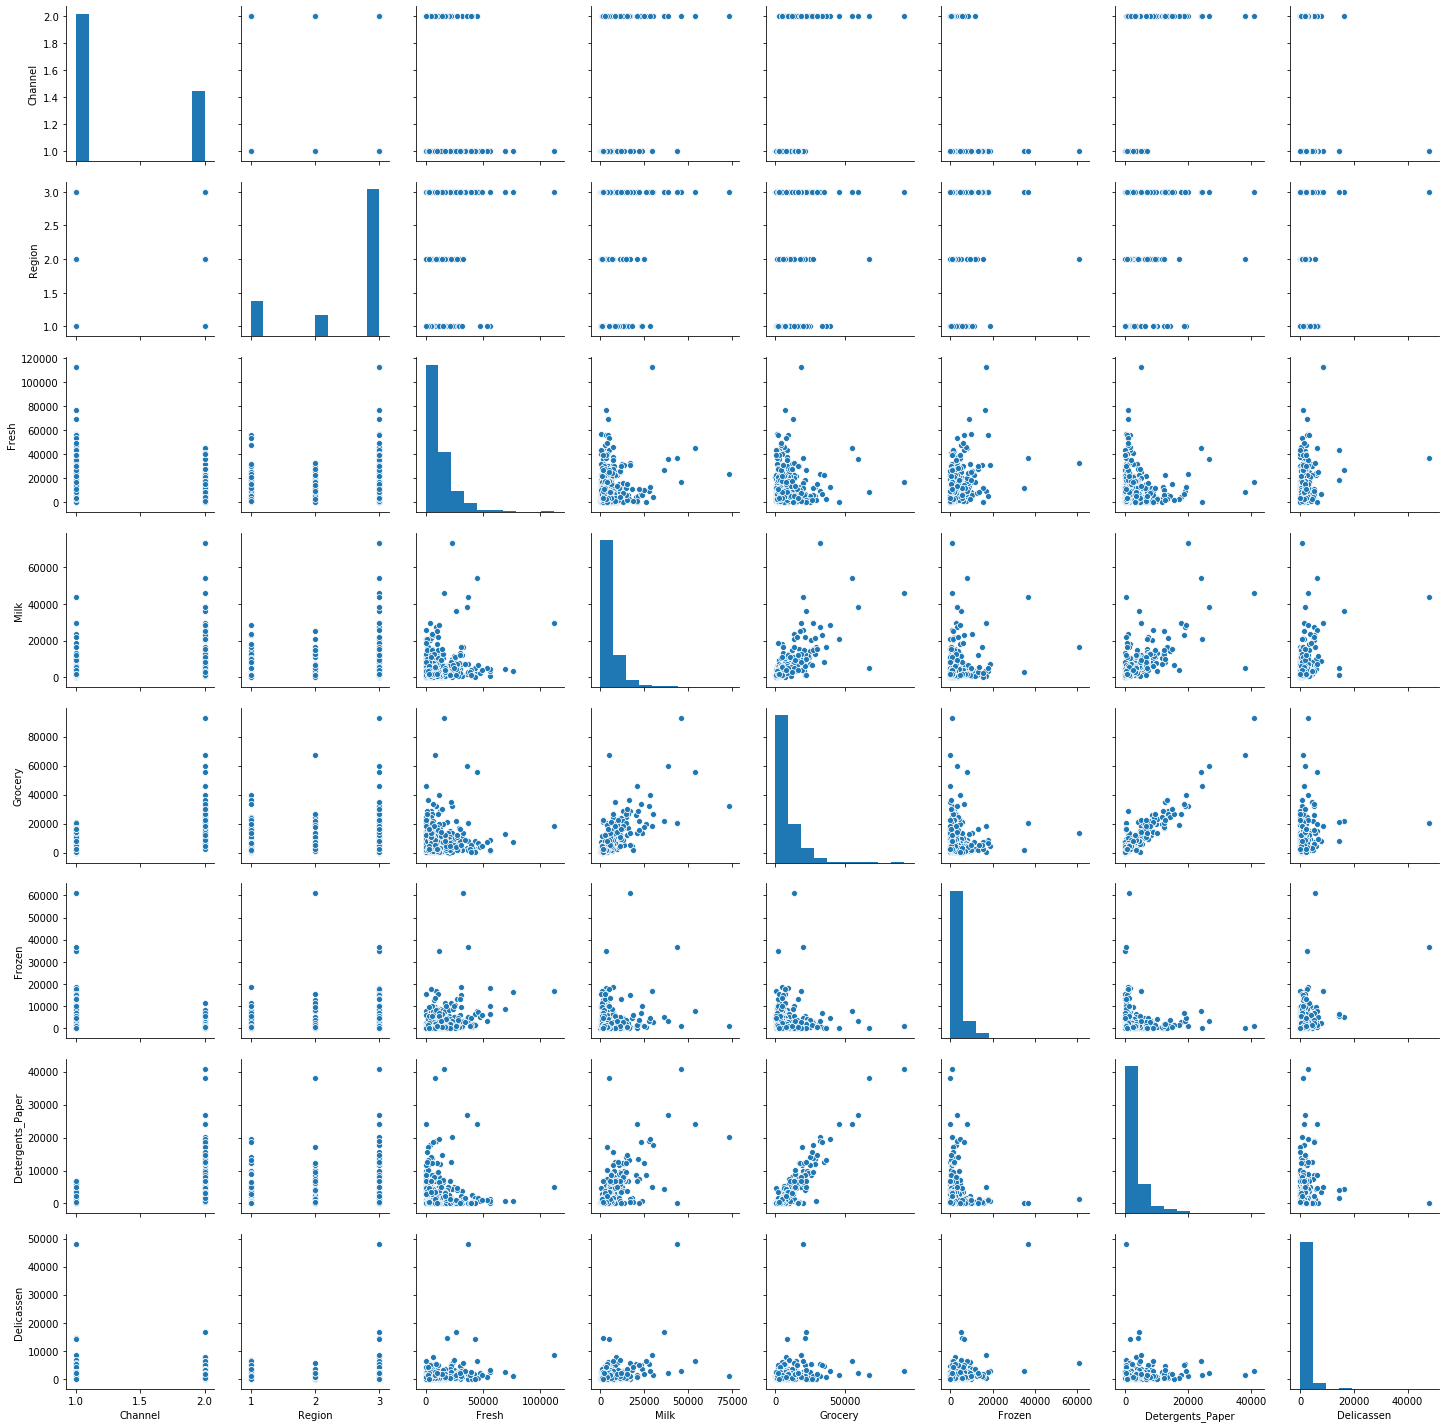

In [13]:
sns.pairplot(df)

In [20]:
indices = [5,10,75]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)



Chosen samples of wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,9413,8259,5126,666,1795,1451
1,2,3,3366,5403,12974,4400,5977,1744
2,1,3,20398,1137,3,4407,3,975


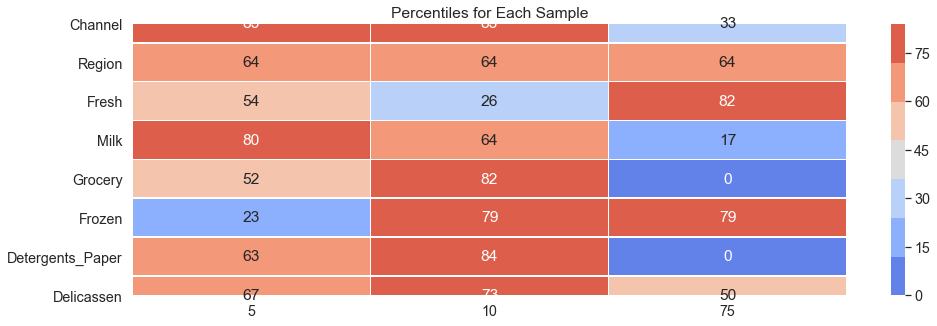

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16,5))
sns.set(font_scale=1.3)
plt.title('Percentiles for Each Sample')
pct = (df.rank(pct=True).loc[indices]*100).astype(int)
sns.heatmap(pct.transpose(), linewidths=0.5, cmap=sns.color_palette("coolwarm", 7), annot=True)
plt.show()

In [27]:
from pandas.plotting import scatter_matrix


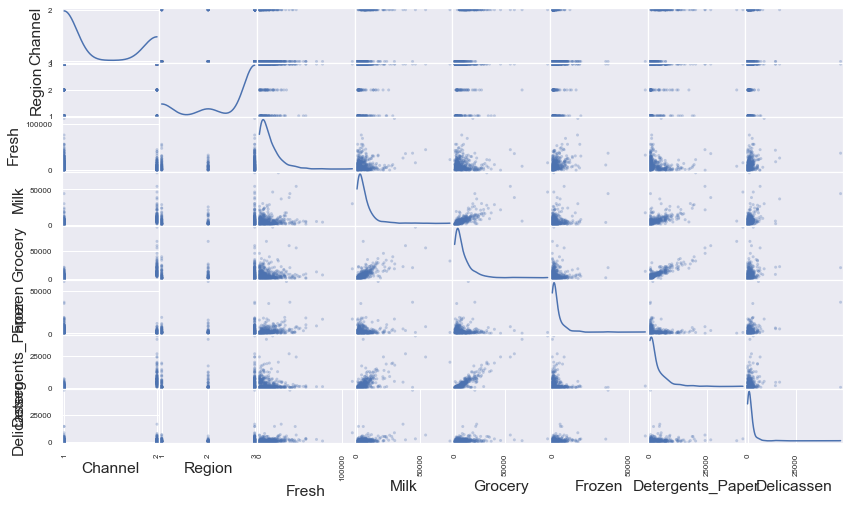

In [29]:
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [39]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65,66,75,128,154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Channel':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Region':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
197,0.693147,0.0,7.794411,8.867427,9.248695,7.027315,8.369621,7.291656
198,0.000000,0.0,9.366147,7.675082,8.828201,8.168203,6.383507,6.546785
199,0.000000,0.0,9.176784,7.731931,7.655391,6.253829,5.996452,5.849325
200,0.693147,0.0,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
201,0.693147,0.0,8.408271,9.574914,10.114882,8.174421,9.563459,7.427144
...,...,...,...,...,...,...,...,...
268,0.693147,0.0,9.384966,8.993800,9.895808,6.974479,8.759982,6.548219
269,0.000000,0.0,9.630234,5.552960,7.037028,7.830426,5.808142,5.318120
270,0.000000,0.0,8.459564,6.939254,6.882437,8.612503,5.283204,4.025352
271,0.000000,0.0,7.641564,8.518592,7.354362,7.021084,4.990433,7.346010


Data points considered outliers for the feature 'Fresh':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,0.000000,1.098612,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,0.693147,1.098612,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,0.000000,1.098612,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,0.693147,1.098612,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,0.000000,1.098612,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
170,0.693147,1.098612,5.560682,9.068201,9.505246,7.017506,8.855806,5.777652
171,0.693147,1.098612,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,0.693147,1.098612,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,0.693147,0.000000,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,0.693147,0.693147,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
98,0.0,1.098612,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,0.0,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,0.0,1.098612,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,0.0,1.098612,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,0.0,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,0.693147,1.098612,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,0.693147,1.098612,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
145,0.693147,1.098612,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,0.693147,1.098612,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,0.693147,0.000000,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
420,0.000000,1.098612,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,0.000000,1.098612,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,0.000000,1.098612,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,0.0,1.098612,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,0.0,1.098612,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,0.000000,1.098612,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,0.693147,1.098612,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,0.000000,1.098612,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,0.000000,1.098612,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,0.000000,1.098612,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,0.000000,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
184,0.000000,1.098612,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,0.000000,1.098612,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,0.000000,0.000000,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,0.000000,0.000000,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


In [40]:
from scipy.stats import zscore
zscore=abs(zscore(df))
print(df.shape)
df=df.loc[(zscore<3).all(axis=1)]
print(df.shape)

(414, 8)
(368, 8)


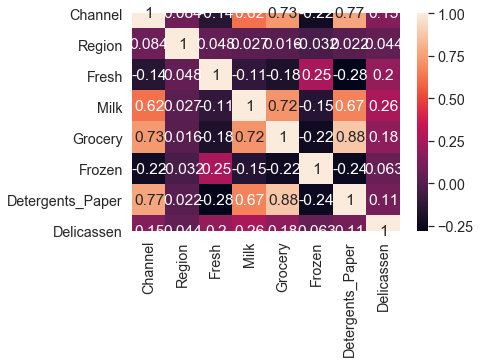

In [41]:
sns.heatmap(df.corr(), annot=True)

In [42]:

from sklearn.tree import DecisionTreeRegressor

features = list(df.columns)
for feature in features:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = df.drop([feature], axis=1)

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, df[feature], test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(feature, score))

R2 score for Channel as dependent variable: 0.07137707281903405
R2 score for Region as dependent variable: -1.8972868217054264
R2 score for Fresh as dependent variable: -0.6015587742025084
R2 score for Milk as dependent variable: 0.1546812020878663
R2 score for Grocery as dependent variable: 0.6278687953221088
R2 score for Frozen as dependent variable: -1.571495361200919
R2 score for Detergents_Paper as dependent variable: 0.4195920677280973
R2 score for Delicassen as dependent variable: -0.32967681327638143


In [43]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.084104,-0.143267,0.616990,0.730893,-0.220771,0.771585,0.150140
Region,0.084104,1.000000,0.048002,0.026502,0.016286,-0.032417,0.021828,0.043506
Fresh,-0.143267,0.048002,1.000000,-0.112181,-0.180972,0.254066,-0.277263,0.198900
Milk,0.616990,0.026502,-0.112181,1.000000,0.717163,-0.151112,0.666690,0.260177
Grocery,0.730893,0.016286,-0.180972,0.717163,1.000000,-0.224495,0.875360,0.176802
Frozen,-0.220771,-0.032417,0.254066,-0.151112,-0.224495,1.000000,-0.241347,0.063220
Detergents_Paper,0.771585,0.021828,-0.277263,0.666690,0.875360,-0.241347,1.000000,0.106378
Delicassen,0.150140,0.043506,0.198900,0.260177,0.176802,0.063220,0.106378,1.000000


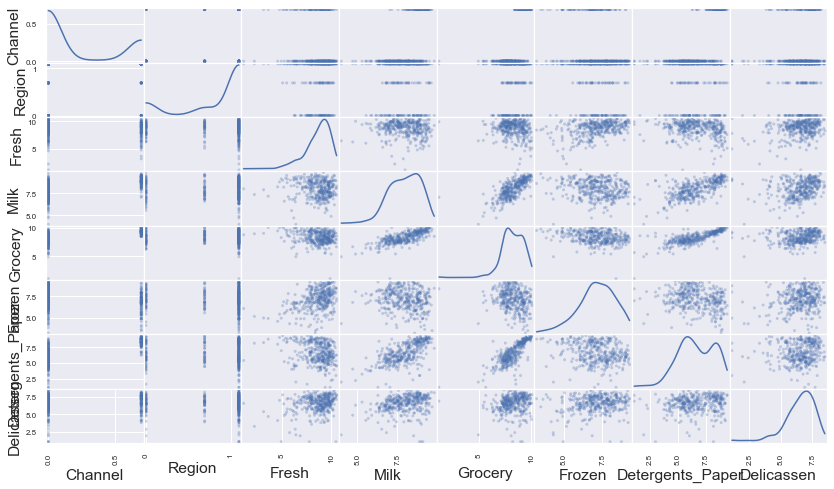

In [44]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(df)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [65]:
from IPython.display import display # Allows the use of display() for DataFrames


import visuals as vs


%matplotlib inline


from sklearn.decomposition import PCA
pca = PCA(n_components=len(df.columns)).fit(df)


pca_samples = pca.transform(log_samples)

pca_results=(good_data,pca)



In [66]:

# DataFrame of results
display(pca_results)

# DataFrame
display(type(pca_results))



(      Channel    Region      Fresh      Milk    Grocery    Frozen  \
 0    0.693147  1.098612   9.446913  9.175335   8.930759  5.365976   
 1    0.693147  1.098612   8.861775  9.191158   9.166179  7.474205   
 2    0.693147  1.098612   8.756682  9.083416   8.946896  7.785305   
 3    0.000000  1.098612   9.492884  7.086738   8.347827  8.764678   
 4    0.693147  1.098612  10.026369  8.596004   8.881558  8.272571   
 ..        ...       ...        ...       ...        ...       ...   
 404  0.000000  1.098612  10.299003  9.396903   9.682030  9.483036   
 405  0.000000  1.098612  10.577146  7.266129   6.638568  8.414052   
 406  0.693147  1.098612   9.584040  9.647821  10.317020  6.079933   
 407  0.000000  1.098612   9.238928  7.591357   7.710653  6.945051   
 408  0.000000  1.098612   7.932721  7.437206   7.828038  4.174387   
 
      Detergents_Paper  Delicassen  
 0            7.891331    7.198931  
 1            8.099554    7.482119  
 2            8.165079    8.967504  
 3        

tuple

In [67]:

# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [68]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.1708,-0.7273
1,-2.1790,-1.0186
2,8.2626,0.0745


In [71]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def produceGaussianMixture(k):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=k, random_state=0).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_ 

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    return score

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters'    
for k in range(2,13):
    score = produceGaussianMixture(k) 
    results = results.append(pd.DataFrame([score],columns=['Silhouette Score'],index=[k]))

display(results)

Number of Clusters,Silhouette Score
2,0.413631
3,0.433236
4,0.376307
5,0.297529
6,0.341661
7,0.362296
8,0.337711
9,0.332239
10,0.321700
11,0.329417


In [73]:
clusterer = GaussianMixture(n_components=2, random_state=0).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_ 



In [75]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = df.keys())
true_centers.index = segments
display(true_centers)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,2.0,2.0,2242.0,7676.0,13185.0,662.0,5448.0,740.0
Segment 1,1.0,2.0,7991.0,2256.0,2881.0,1767.0,419.0,724.0


In [76]:
display(df.mean())

Channel                 1.288043
Region                  2.548913
Fresh               10001.608696
Milk                 4217.554348
Grocery              6012.720109
Frozen               2231.125000
Detergents_Paper     2026.442935
Delicassen           1079.157609
dtype: float64

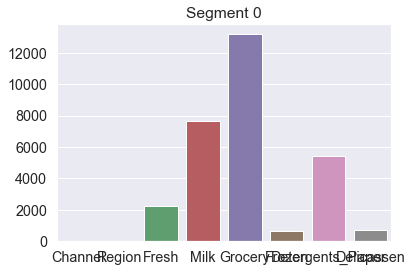

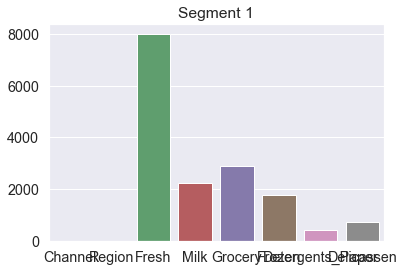

In [77]:
plt.figure()
plt.axes().set_title("Segment 0")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[0].values)

plt.figure()
plt.axes().set_title("Segment 1")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[1].values)

In [78]:
sample_preds = clusterer.predict(pca_samples)
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [79]:
samples

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,9413,8259,5126,666,1795,1451
1,2,3,3366,5403,12974,4400,5977,1744
2,1,3,20398,1137,3,4407,3,975
